# 트리 알고리즘

In [3]:
#결정 트리

In [40]:
import pandas as pd
red_wine = pd.read_csv('data/winequality-red.csv', sep=';') # sep=';' 데이터 정렬해줌
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
#정보수정
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']] #이 세가지 정보를 사용할거임
red_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
red_wine['class'] = 0 #class는 0으로 채움// 타깃값이 0이면 레드, 1이면 화이트
red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [42]:
#정보수정
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']] #이 세가지 정보를 사용할거임
white_wine.rename(columns={'residual sugar': 'sugar'}, inplace=True)
white_wine['class'] = 1 #class는 1으로 채움
white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [43]:
#두 데이터를 합치기/ concat=위아래로 합침
wine = pd.concat([red_wine, white_wine])

In [44]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [45]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [46]:
#데이터 분류//판다스 데이터프레임을 넘파이 배열로 바꾸고 훈련 세트와 테스트 세트로 나눔
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [47]:
#훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target)

In [51]:
#StandardScaler을 사용해 훈련세트 전처리, 같은 객체를 사용해 테스트 세트 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [52]:
#로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7873563218390804
0.7649230769230769


C:\Users\1-02\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
#결정트리
#fit으로 훈련 후 score로 정확도 평가
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=50)
dt.fit(train_scaled, train_target)


print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9967159277504105
0.8578461538461538


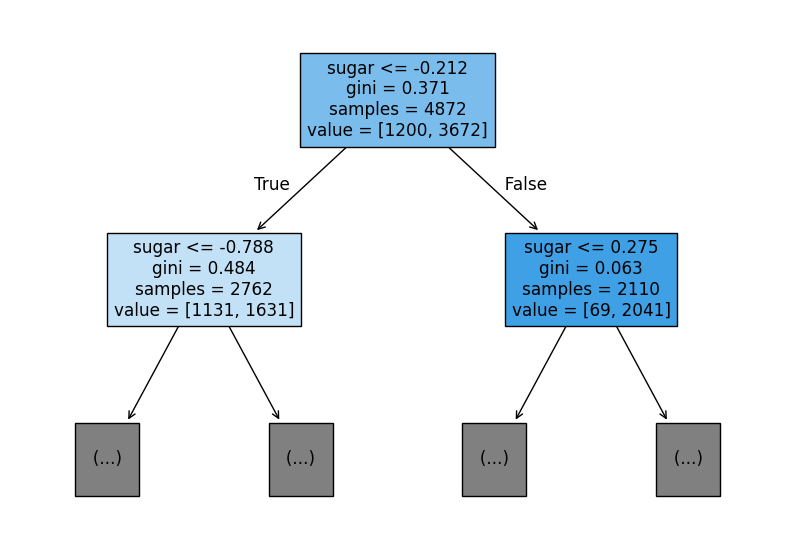

In [63]:
#결정트리 출력 plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) #max_depth=1 = 최상단만 보겠다
plt.show()